<a href="https://colab.research.google.com/github/mohamedalifaragitiai/Computer-Vision-Practical/blob/main/AlexNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AlexNet CNN is probably one of the simplest methods to approach understanding deep learning concepts and techniques.

AlexNet is not a complicated architecture when it is compared with some state of the art CNN architectures that have emerged in the more recent years.

AlexNet is simple enough for beginners and intermediate deep learning practitioners to pick up some good practices on model implementation techniques.

In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
CLASS_NAMES= ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
train_ds=tf.data.Dataset.from_tensor_slices((train_images,train_labels))
test_ds=tf.data.Dataset.from_tensor_slices((test_images,test_labels))

**Preprocessing**

Usually, preprocessing is conducted to ensure the data utilized is within an appropriate format.

First, let’s visualize the images within the CIFAR-10 dataset.

The CIFAR-10 images have small dimensions, which makes visualization of the actual pictures a bit difficult.

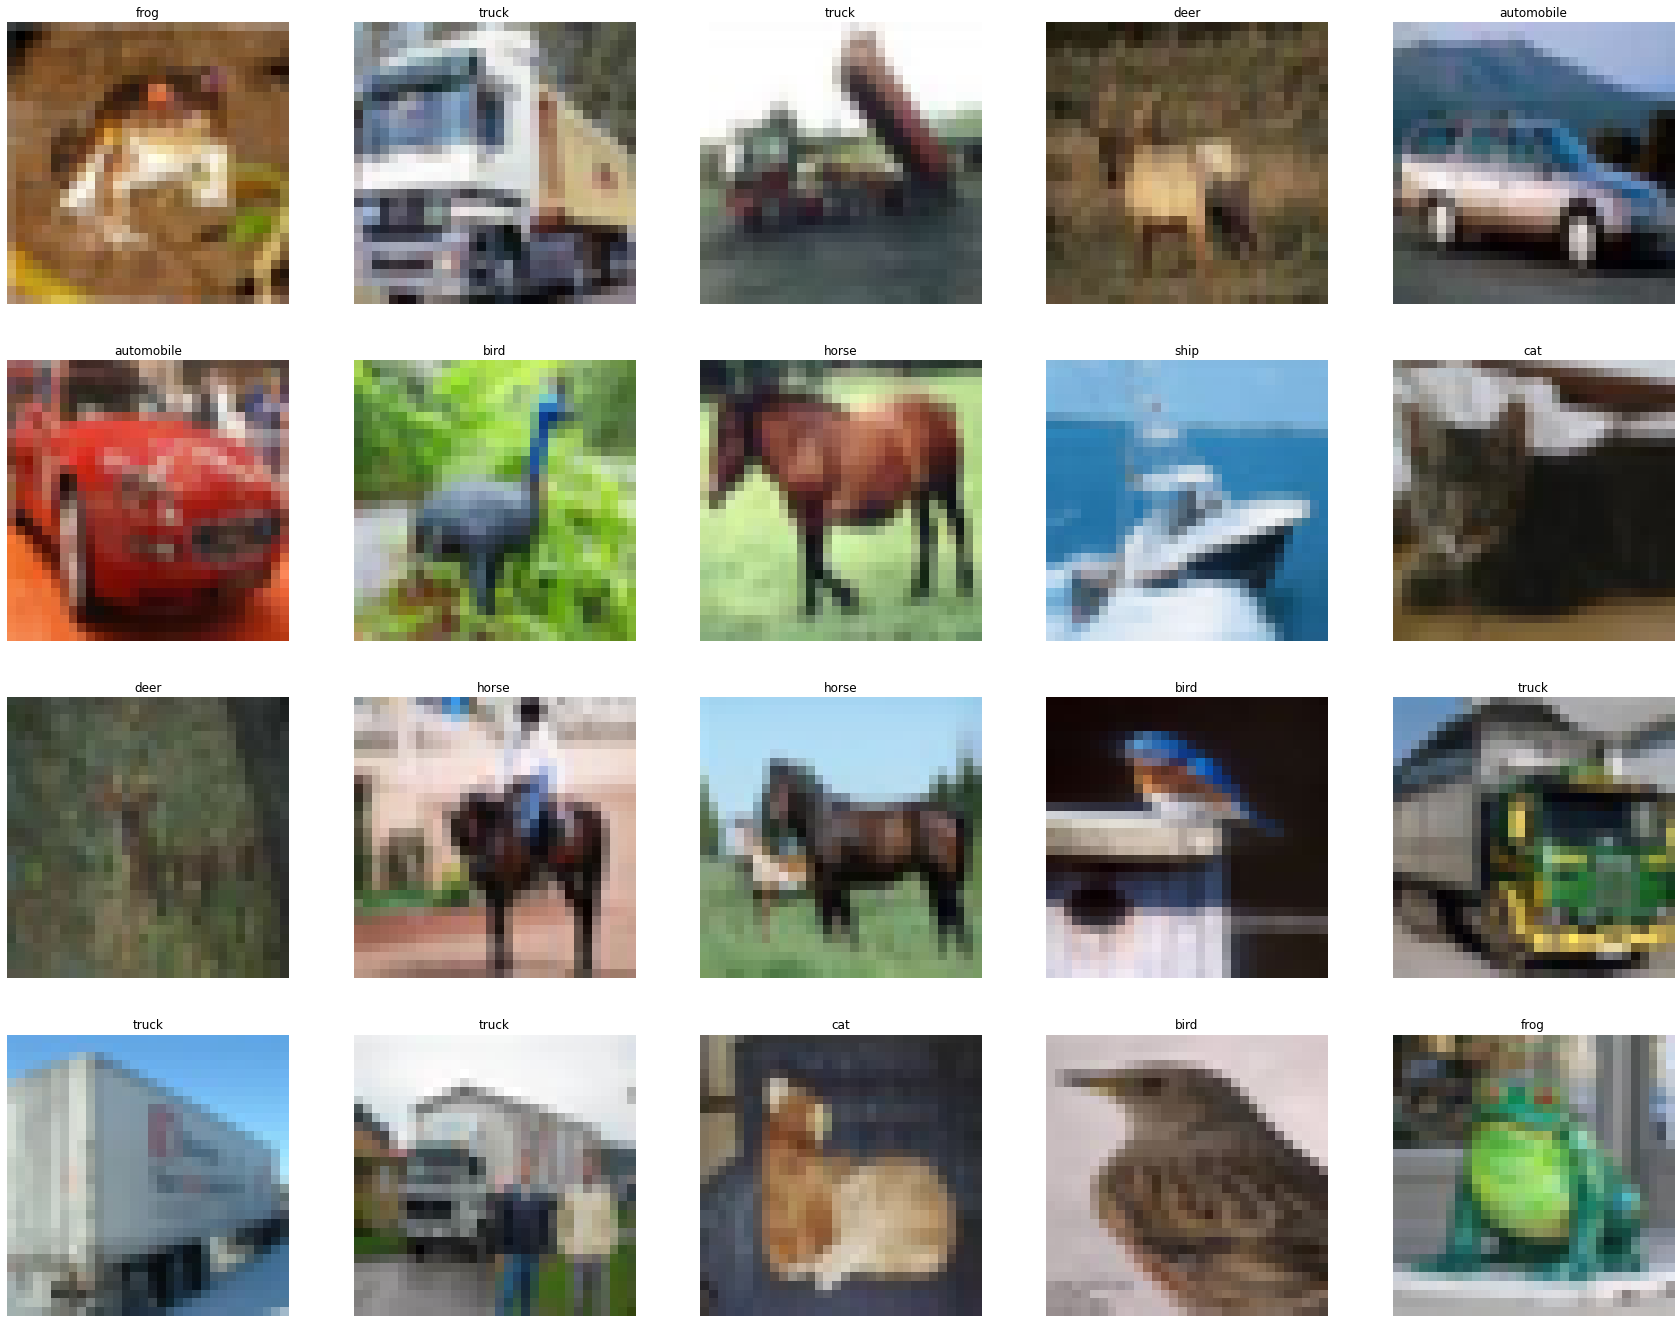

In [5]:
plt.figure(figsize=(30,30))
for i,(image,label) in enumerate(train_ds.take(20)):
    #print(label)
    ax=plt.subplot(5,5,i+1)
    plt.imshow(image)
    plt.title(CLASS_NAMES[label.numpy()[0]])
    plt.axis('off')

This function will perform all preprocessing work that we require for the data. This function is called further down the machine learning workflow.

In [6]:
def process_image(image,label):
    image=tf.image.per_image_standardization(image)
    image=tf.image.resize(image,(64,64))
    
    return image,label

**Data Pipeline**

In [7]:
train_ds_size=tf.data.experimental.cardinality(train_ds).numpy()
test_ds_size=tf.data.experimental.cardinality(test_ds).numpy()
print('Train size:',train_ds_size)
print('Test size:',test_ds_size)

Train size: 50000
Test size: 10000


For our basic input/data pipeline, we will conduct three primary operations:
1. Preprocessing the data within the dataset
2. Shuffle the dataset
3. Batch data within the dataset

In [8]:
train_ds=(train_ds
          .map(process_image)
          .shuffle(buffer_size=train_ds_size)
          .batch(batch_size=32,drop_remainder=True)
         )
test_ds=(test_ds
          .map(process_image)
          .shuffle(buffer_size=test_ds_size)
          .batch(batch_size=32,drop_remainder=True)
         )

**Model Implementation**

Within this section, we will implement the AlexNet CNN architecture from scratch. Through the utilization of Keras Sequential API, we can implement consecutive neural network layers within our models that are stacked against each other.

Here are the types of layers the AlexNet CNN architecture is composed of, along with a brief description

**Convolutional layer:**

A convolution is a mathematical term that describes a dot product multiplication between two sets of elements. Within deep learning the convolution operation acts on the filters/kernels and image data array within the convolutional layer. Therefore a convolutional layer is simply a layer the houses the convolution operation that occurs between the filters and the images passed through a convolutional neural network.

**Batch Normalisation layer**

Batch Normalization is a technique that mitigates the effect of unstable gradients within a neural network through the introduction of an additional layer that performs operations on the inputs from the previous layer. The operations standardize and normalize the input values, after that the input values are transformed through scaling and shifting operations.

**MaxPooling layer**

Max pooling is a variant of sub-sampling where the maximum pixel value of pixels that fall within the receptive field of a unit within a sub-sampling layer is taken as the output. The max-pooling operation below has a window of 2x2 and slides across the input data, outputting an average of the pixels within the receptive field of the kernel.

**Flatten layer:**

Takes an input shape and flattens the input image data into a one-dimensional array.

**Dense Layer:**

A dense layer has an embedded number of arbitrary units/neurons within. Each neuron is a perceptron.

The code snippet represents the Keras implementation of the AlexNet CNN architecture.

In [9]:
model=keras.models.Sequential([
    keras.layers.Conv2D(filters=128, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(64,64,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3)),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10,activation='softmax')  
    ])

In [10]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.optimizers.SGD(lr=0.001),
    metrics=['accuracy']    
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 128)       46592     
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 128)      512       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 7, 7, 128)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 256)         819456    
                                                                 
 batch_normalization_1 (Batc  (None, 7, 7, 256)        1024      
 hNormalization)                                                 
                                                        

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


 max_pooling2d_2 (MaxPooling  (None, 1, 1, 256)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 1024)              263168    
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                10250     
                                                                 
Total para

In [13]:
history=model.fit(
    train_ds,
    epochs=2,
    validation_data=test_ds,
    validation_freq=1
)

Epoch 1/2
1562/1562 [==============================] - 630s 397ms/step - loss: 1.7523 - accuracy: 0.3629 - val_loss: 1.4558 - val_accuracy: 0.4821
Epoch 2/2
1562/1562 [==============================] - 613s 390ms/step - loss: 1.5664 - accuracy: 0.4341 - val_loss: 1.3411 - val_accuracy: 0.5174


In [14]:
model.history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Now we will visualize the training over the different epochs .**

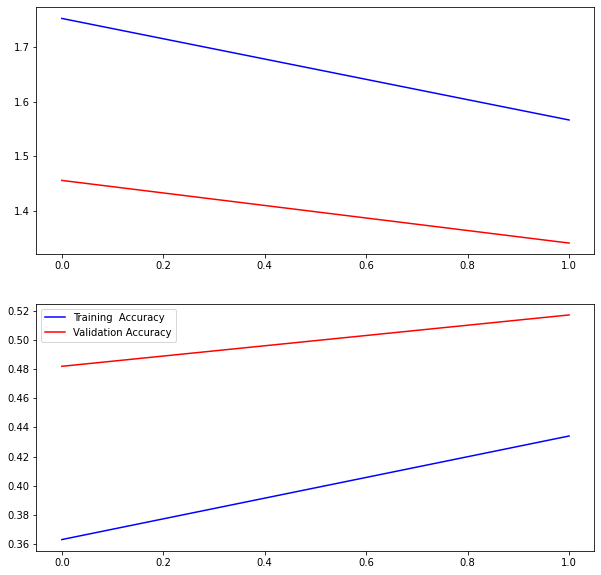

In [15]:
f,ax=plt.subplots(2,1,figsize=(10,10)) 

#Assigning the first subplot to graph training loss and validation loss
ax[0].plot(model.history.history['loss'],color='b',label='Training Loss')
ax[0].plot(model.history.history['val_loss'],color='r',label='Validation Loss')

#Plotting the training accuracy and validation accuracy
ax[1].plot(model.history.history['accuracy'],color='b',label='Training  Accuracy')
ax[1].plot(model.history.history['val_accuracy'],color='r',label='Validation Accuracy')

plt.legend()

In [16]:
print('Accuracy Score = ',np.max(history.history['val_accuracy']))

Accuracy Score =  0.5174278616905212
